In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import os, glob

In [2]:
df_category_combined = pd.read_csv('./Anno/changed/etri/category_combined.csv')

In [3]:
df_attr_combined = pd.read_csv('./Anno/changed/etri/attr_combined.csv')

In [4]:
df_attr_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,Sheer_Pleated-Front_Blouse_img_00000001,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Sheer_Pleated-Front_Blouse_img_00000002,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Sheer_Pleated-Front_Blouse_img_00000003,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Sheer_Pleated-Front_Blouse_img_00000004,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Sheer_Pleated-Front_Blouse_img_00000005,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
df_category_combined.head()

,category_label,category_name,category_type,image_name
0,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000001
1,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000002
2,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000003
3,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000004
4,1,Anorak,1,Hooded_Cotton_Canvas_Anorak_img_00000005


In [6]:
lst_coat_fname = [f.name[:-4] for f in os.scandir('./coat') if f.is_file()]
lst_dress_fname = [f.name[:-4] for f in os.scandir('./dress') if f.is_file()]
lst_jacket_fname = [f.name[:-4] for f in os.scandir('./jacket') if f.is_file()]
lst_jumper_fname = [f.name[:-4] for f in os.scandir('./jumper') if f.is_file()]
lst_pants_fname = [f.name[:-4] for f in os.scandir('./pants') if f.is_file()]
lst_shirt_fname = [f.name[:-4] for f in os.scandir('./shirt') if f.is_file()]
lst_skirt_fname = [f.name[:-4] for f in os.scandir('./skirt') if f.is_file()]
lst_winterJacket_fname = [f.name[:-4] for f in os.scandir('./winter jacket') if f.is_file()]

In [8]:
def createCategoryDataFrame(lst_category_fname, category_label, category_name):
    
    df_category = pd.DataFrame(lst_category_fname, columns=['image_name'])
    df_category.insert(1,'category_label', category_label)
    df_category.insert(1,'category_name', category_name)

    return df_category

In [9]:
df_shirt = createCategoryDataFrame(lst_shirt_fname, 0, 'shirt')
df_jumper = createCategoryDataFrame(lst_jumper_fname, 1, 'jumper')
df_jacket = createCategoryDataFrame(lst_jacket_fname, 2, 'jacket')
#df_vest = createCategoryDataFrame(lst_vest_fname, 3, 'Vest')
df_winterJacket = createCategoryDataFrame(lst_winterJacket_fname, 4, 'winter jacket')
df_coat = createCategoryDataFrame(lst_coat_fname, 5, 'coat')
df_dress = createCategoryDataFrame(lst_dress_fname, 6, 'dress')
df_pants = createCategoryDataFrame(lst_pants_fname, 7, 'pants')
df_skirt = createCategoryDataFrame(lst_skirt_fname, 8, 'skirt')

In [10]:
df_shirt.head()

,image_name,category_name,category_label
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0


In [11]:
df_jumper.head()

,image_name,category_name,category_label
0,Hooded_Cotton_Canvas_Anorak_img_00000001,jumper,1
1,Hooded_Cotton_Canvas_Anorak_img_00000002,jumper,1
2,Hooded_Cotton_Canvas_Anorak_img_00000003,jumper,1
3,Hooded_Cotton_Canvas_Anorak_img_00000004,jumper,1
4,Hooded_Cotton_Canvas_Anorak_img_00000005,jumper,1


In [12]:
df_shirt_attr_combined = pd.merge(df_shirt, df_attr_combined)
df_jumper_attr_combined = pd.merge(df_jumper, df_attr_combined)
df_jacket_attr_combined = pd.merge(df_jacket, df_attr_combined)
df_winterJacket_attr_combined = pd.merge(df_winterJacket, df_attr_combined)
df_coat_attr_combined = pd.merge(df_coat, df_attr_combined)
df_dress_attr_combined = pd.merge(df_dress, df_attr_combined)
df_pants_attr_combined = pd.merge(df_pants, df_attr_combined)
df_skirt_attr_combined = pd.merge(df_skirt, df_attr_combined)

In [13]:
df_winterJacket_attr_combined.head()

,image_name,category_name,category_label,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,Corduroy_Hooded_Parka_img_00000001,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Corduroy_Hooded_Parka_img_00000002,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Corduroy_Hooded_Parka_img_00000003,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Corduroy_Hooded_Parka_img_00000004,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Corduroy_Hooded_Parka_img_00000005,winter jacket,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [14]:
dress_attr_frequency = (df_dress_attr_combined.iloc[:,3:] == 1).sum(axis=0)
dress_attr_frequency_sort=dress_attr_frequency.sort_values(ascending = False)

In [15]:
dress_attr_frequency_sort

maxi                  12600
print                 12033
lace                   9900
floral                 9828
bodycon                5761
shift                  4805
chiffon                4297
sleeve                 4276
fit                    4169
flare                  4133
sleeveless             3626
sheath                 3078
floral print           3027
crochet                2959
embroidered            2904
strapless              2892
midi                   2833
knit                   2817
summer                 2550
pleated                2547
striped                2495
cami                   2347
stripe                 2300
a-line                 2155
red                    2141
mini                   2053
cutout                 2043
party                  2025
pink                   1930
shirt                  1889
                      ...  
high-rise skinny          0
high-rise                 0
cami crop                 0
heathered v-neck          0
classic cotton      

Text(0, 0.5, 'count')

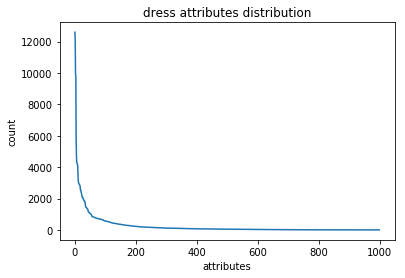

In [16]:
plt.plot([x for x in range(len(dress_attr_frequency_sort))], [val for val in dress_attr_frequency_sort])
plt.title("dress attributes distribution")
plt.xlabel("attributes")
plt.ylabel("count")
#plt.savefig('result/total_attr_distr.png')

In [20]:
[col for col in df_attr_combined if 'white ' in col]

[]

In [21]:
[col for col in df_attr_combined if 'black ' in col]

[]

In [22]:
[col for col in df_attr_combined if 'gray ' in col]

[]

In [23]:
[col for col in df_attr_combined if 'pink ' in col]

['pink ']

In [24]:
[col for col in df_attr_combined if 'red ' in col]

['blurred ',
 'checkered ',
 'chiffon layered ',
 'collared ',
 'crochet embroidered ',
 'embroidered ',
 'embroidered fit ',
 'embroidered floral ',
 'embroidered gauze ',
 'embroidered gauze peasant ',
 'embroidered lace ',
 'embroidered maxi ',
 'embroidered mesh ',
 'embroidered peasant ',
 'embroidered shift ',
 'embroidered woven ',
 'flared ',
 'floral textured ',
 'floral-embroidered ',
 'gathered waistline ',
 'heathered ',
 'heathered knit ',
 'heathered stripe ',
 'heathered v-neck ',
 'lace layered ',
 'layered ',
 'mirrored ',
 'red ',
 'shirred ',
 'southwestern-inspired ',
 'structured ',
 'textured ',
 'textured woven ',
 'tiered ',
 'tribal-inspired ',
 'zippered ']

In [102]:
[col for col in df_attr_combined if 'sleeve ' in col]

['bell-sleeve ',
 'cap-sleeve ',
 'cuffed-sleeve ',
 'dolman sleeve ',
 'dolman-sleeve ',
 'drop-sleeve ',
 'flutter sleeve ',
 'flutter-sleeve ',
 'lace sleeve ',
 'long sleeve ',
 'long-sleeve ',
 'raglan sleeve ',
 'sleeve ']

In [103]:
[col for col in df_attr_combined if 'color' in col]

['colorblock ', 'colorblock pocket ', 'colorblocked ', 'watercolor ']

In [104]:
[col for col in df_attr_combined if 'gender' in col]

[]

In [106]:
[col for col in df_attr_combined if 'girl' in col]

['girl ', 'girls ']

In [107]:
[col for col in df_attr_combined if 'boy' in col]

['boyfriend ']

In [85]:
def isAttribute(lst_attribute):
    for col in lst_attribute:
        try:
            df_attr_combined[col]
            print("'"+col+"' exists")
        except :
            print("'"+col+"' doesn't exist")
            pass

In [95]:
lst_color = ['white ', 'black ', 'gray ', 'pink ', 'red ', 'green ', 'blue ', 'brown ', 'navy ', 'beige ', 'yellow ', 'purple ', 'orange ']
lst_gender = ['man ', 'woman ']
lst_sleeves = ['short sleeves ', 'long sleeves ', 'no sleeves ', 'short ', 'long ']
lst_season = ['spring ', 'summer ', 'autumn ', 'winter ']
lst_pattern = ['single ', 'checker ', 'dotted ', 'floral ', 'striped ']

In [97]:
isAttribute(lst_color)

'white ' doesn't exist
'black ' doesn't exist
'gray ' doesn't exist
'pink ' exists
'red ' exists
'green ' doesn't exist
'blue ' doesn't exist
'brown ' doesn't exist
'navy ' doesn't exist
'beige ' doesn't exist
'yellow ' doesn't exist
'purple ' doesn't exist
'orange ' doesn't exist


In [98]:
isAttribute(lst_gender)

'man ' doesn't exist
'woman ' doesn't exist


In [99]:
isAttribute(lst_sleeves)

'short sleeves ' doesn't exist
'long sleeves ' doesn't exist
'no sleeves ' doesn't exist
'short ' doesn't exist
'long ' doesn't exist


In [100]:
isAttribute(lst_season)

'spring ' doesn't exist
'summer ' exists
'autumn ' doesn't exist
'winter ' doesn't exist


In [101]:
isAttribute(lst_pattern)

'single ' doesn't exist
'checker ' doesn't exist
'dotted ' exists
'floral ' exists
'striped ' exists
